**Linear Regression** is often the first algorithm that is taught in an introductory machine learning course. It's also one of the first machine learning algorithms people implement in code. However, results of fitting data using Linear Regression can be very misleading if the assumptions of Linear Regression are not satisfied by the dataset you are using. 


A very basic paramter that beginners use to measure the accuracy of the model is the **r-squared coefficient**. However, r-sqaured coeffiecient can be only trusted when the assumptions of Linear Regression are met. You could end up with a model that does a poor job of modelling the data, yet gives a high r-sqaured value. We're going to take a look at such an example as we try to predict the closing price of a Google's stock for the next 10 days. 


We're going to use Quandl to get the stock data, the Pandas library to manipulate the data, and statsmodel module to train our model. I've regressed (Get the pun?) from using sklearn, which I'd normally use because Statsmodel has some really neat regression analysis features (such as a R-like summary table), which I can't seem to find in sklearn. 

In [7]:
%matplotlib inline

import quandl as qd #Library to get the stock data
import numpy as np #A Fast numerical Library
import pickle #To save the classifier for later resuse
import pandas as pd #Library to manpulate data
import datetime
import statsmodels.formula.api as smf #Used to train the model
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]
from sklearn import preprocessing
from IPython.display import display
import math

The first thing we are going to do here is pull the data from Quandl. Quandl is a website that hosts a bunch of datasets that you could directly load into python using the quandl module. 

In [8]:
# api_key = 'fiz_cgR7TxgcofzoHqnA'
df = qd.get("WIKI/GOOGL")
display(df.head())


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


I am not going to use the features the way they are given in the dataframe. Though feature selection and feature engineering form arguably the most critical part of the model training process, I'm going to skim over it for now, so as to focus on the main topic here, i.e, testing the statistical assumptions of Linear Regression. 

You'll see a lot of columns in the table come in two flavours; Regular and the Adjusted ones. The adjusted ones account for stock splits (One stock becomes two, and the value of each stock is halfed), whereas the regular one doesn't, so we are going to drop those columns. 

In [9]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df.columns = ['Open',  'High',  'Low',  'Close', 'Volume']

We will try to predict the price of stock for the next 10 days. For this we'll create our target variable and name it 'prediction'. In order to generate the entries for this variable in our training set, we lag the values of *'Adj. Close'* by 10 rows (days).  We'll also drop the bottom 10 rows which will have NaN values for the *predict* column. 

In [10]:
forecast_col = 'Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['predict'] = df[forecast_col].shift(forecast_out)


In [11]:
df.dropna(inplace = True)

In [12]:
df.corr()

,Open,High,Low,Close,Volume,predict
Open,1.000000,0.999859,0.999798,0.999657,-0.560961,0.983204
High,0.999859,1.000000,0.999768,0.999820,-0.558750,0.983367
Low,0.999798,0.999768,1.000000,0.999856,-0.564822,0.982715
Close,0.999657,0.999820,0.999856,1.000000,-0.561983,0.982962
Volume,-0.560961,-0.558750,-0.564822,-0.561983,1.000000,-0.564441
predict,0.983204,0.983367,0.982715,0.982962,-0.564441,1.000000


Here we see that the the variables *Open, High, Low, Close* are highly correlated. Let us drop all of them but *Close* variable while training our model. I've also dropped *Volume* to keep things simple. We could try another model later which has *Volume* in it too. Let us train our first linear model. 

In [13]:
lm1 = smf.ols(formula='predict ~ Close', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                predict   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 8.662e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:34:40   Log-Likelihood:                -14927.
No. Observations:                3031   AIC:                         2.986e+04
Df Residuals:                    3029   BIC:                         2.987e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.8595      1.292      3.761      0.000         2.326     7.393
Close          0.9641      0.003    294.316      0.000         0.958     0.971
==============================================================================
Omnibus:                       50.193   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.329
Skew:                          -0.050   Prob(JB):                     1.99e-21
Kurtosis:                       3.863   Cond. No.                         842.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above table is one of the reasons I've prefered the use of Statsmodels to sklearn. Don't worry, you don't need to understand the entire table for this tutorial. Right now, we need to look at **Adj. R-squared** which is 0.966. A lot of beginners think this is a suuficient to evaluate the quality of a linear model. However, there is other stuff that we can look for. 

An interesting feature is the **[95.0% Conf. Int.]** or the **Confidence Intervals** for the coefficients. What is exactly mean't by confidence intervals? We assume that the training set we use is sampled from a population. We then fit our model to the data. So, the value of a particular coefficient would lie in it's *95% confidence interval* about 95 out of every 100 times we sample and fit the training set. 

**You should be alarmed if zero also falls in the confidence interval of a coefficient.** This means that there's a considerable probability that value of coefficient is zero, which implies there's no relationship between the feature and our target. Another feature that can tell us about such a problem is the **p-value** represented by the **P>|t|** column. It basically measures that probability that zero is present the confidence interval. In other words, it measures whether the relationship we observe is merely a statistical fluke. 

Since we're using 95% confidence intervals, the p-value for all the coefficients must be less than 0.05. We could also look at the **T-value** given by **t** column, which measures the number of standard deviations the coefficient is away from zero. Typically, for 95% confidence intervals, T-value should be more than 4 in magnitude. 

The current model fulfills all the above criteria. High value of r-squares, all the p-values below 0.05, and all the t-values above 4. 

## Job Done! ##

*Actually, no.*

What people often miss is all the rules we've described above can only be trusted given the the data obeys the assumptions of Linear Regression. Which are, 

1. The relationship between the dependent variables and the independent variables is a linear and an additive one. 
2. Errors are statistically independendent, i.e. no correlation amongst errors. 
3. Homoscedasticity, or the constant variance of errors
4. Errors are normally distributed. 

So, we must check the data for these assumptions, otherwise all the quality parameters don't mean anything.  Let us plot error vs time graph first. 


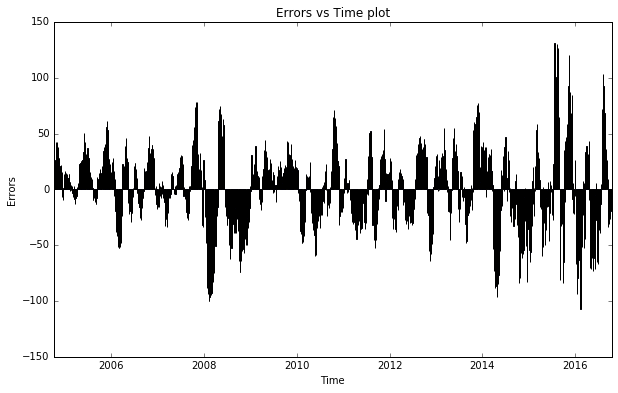

In [14]:
preds = lm1.predict()  #Get the predictions for our training set.
errors = preds - df["predict"] #Calculate the errors
time_data = np.array([df.iloc[i].name.to_datetime() for i in range(len(df))]) #generate an array of dates 
plt.bar(time_data, errors)
plt.ylabel("Errors")
plt.xlabel("Time")
plt.title("Errors vs Time plot")
    


It's very easy to see that assumptions 2 and 3 are clearly violated. First of all we see that the errors don't have a constant variance. Secondly, there's strong correlations amongst errors. How can we say that? we see postitive errors are followed by positive errors while the negative ones are followed by negative ones. When such correlation happens in a time series, (like stocks here), it's also known as **autocorrelation**(In this case, it's positive autocorrelation). Infact, to conclude whether the errors have a correlation by having a look at their plots can be a tricky bargain if the results ae not as obvious as they are in the graph above. Thankfully, pandas provides us with a an option to calculate autocorrelation. 

In [15]:
errors.autocorr(1),errors.autocorr(2),errors.autocorr(3),

(0.96520014498479312, 0.92691457809339961, 0.88795274990286011)

The parameter of the function is the lag between the errors for which the autocorrelation is calculated. The autocorrelation in our model is alarmilngly high, and therefore this model can't be trusted. Although, we've got enough evidence to reject the model, let's also check whether the errors are normally distributed or not.


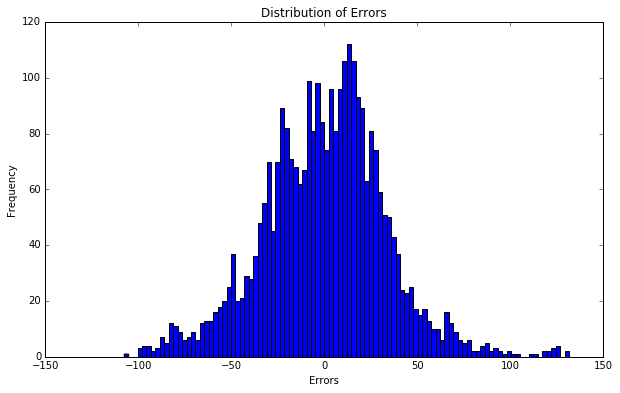

In [16]:
errors = lm1.predict() - df["predict"]
plt.hist(errors, bins = 100)
plt.xlabel("Errors")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")


The problem of normality with errors is not as big as the problem with other two assumptions, but we could still improve on this front. 

Now, what can we do? An alternative is to also include *Volume* feature while training model. A lot of times, the  violations of assumptions can arise if we leave out important features while training the model. Then, the errors we observe will contain the unmodelled effects of such features, and thus, will violate the assumptions. Let's give it a go. 


In [17]:
lm2 = smf.ols(formula='predict ~ Close + Volume', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                predict   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 4.358e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:34:53   Log-Likelihood:                -14917.
No. Observations:                3031   AIC:                         2.984e+04
Df Residuals:                    3028   BIC:                         2.986e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.4546      1.984      5.772      0.000         7.564    15.346
Close          0.9544      0.004    241.714      0.000         0.947     0.962
Volume     -3.782e-07   8.66e-08     -4.369      0.000     -5.48e-07 -2.08e-07
==============================================================================
Omnibus:                       53.552   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.582
Skew:                           0.014   Prob(JB):                     7.18e-24
Kurtosis:                       3.918   Cond. No.                     3.94e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again, we have stellar quality paramters but let us check on the assumptions front. 

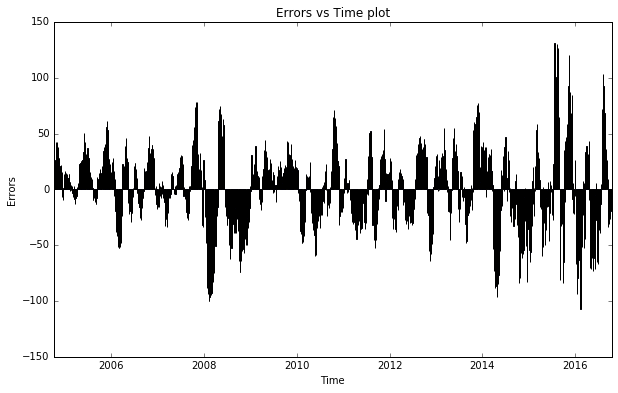

In [18]:
preds = lm1.predict()  #Get the predictions for our training set.
errors = preds - df["predict"] #Calculate the errors
time_data = np.array([df.iloc[i].name.to_datetime() for i in range(len(df))]) #generate an array of dates 
plt.bar(time_data, errors)
plt.ylabel("Errors")
plt.xlabel("Time")
plt.title("Errors vs Time plot")

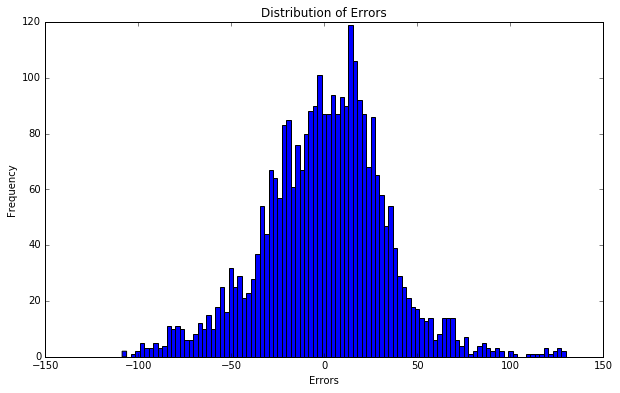

In [19]:
errors = lm2.predict() - df["predict"]
plt.hist(errors, bins = 100)
plt.xlabel("Errors")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")

Adding *Volume* label doesn't make things any better. We have the same problems as before. Another approach we could take is transforming the variables. Violations can arise if the relationship between the dependent and target variables is not a linear one. Trying to a fit a linear model to variables with non-linear relationships can especially lead to errors which don't have constant variance. 

Stocks are often observed to show almost a constant percent change over time. In such a case, the relationship is a multiplicative one, not a linear and additive one. Applying a log transformation to all the variables turns this relationship into a linear and additive one. 

In [20]:
lm3 = smf.ols(formula='np.log(predict) ~ np.log(Close)', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(predict)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 6.640e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:35:12   Log-Likelihood:                 2261.8
No. Observations:                3031   AIC:                            -4520.
Df Residuals:                    3029   BIC:                            -4508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.0866      0.023     -3.849      0.000        -0.131    -0.042
np.log(Close)     1.0104      0.004    257.673      0.000         1.003     1.018
==============================================================================
Omnibus:                       89.594   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.564
Skew:                          -0.082   Prob(JB):                     2.10e-48
Kurtosis:                       4.308   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, we obtain satisfactory values. Let's check how the errors pan out. 

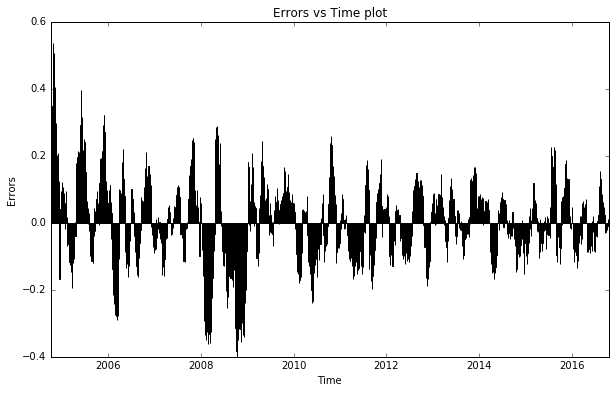

In [21]:
preds = lm3.predict()
errors = preds - np.log(df["predict"])
time_data = np.array([df.iloc[i].name.to_datetime() for i in range(len(df))]) #generate an array of dates 
plt.bar(time_data, errors)
plt.ylabel("Errors")
plt.xlabel("Time")
plt.title("Errors vs Time plot")

(array([   2.,    1.,    1.,    0.,    3.,    4.,    6.,   10.,    5.,
           5.,    3.,    7.,   10.,    3.,   10.,    8.,   13.,    4.,
           6.,    9.,    4.,   13.,   11.,   14.,   22.,   25.,   35.,
          40.,   52.,   49.,   54.,   64.,   80.,  100.,   78.,   93.,
          95.,   91.,  105.,  106.,  112.,   93.,  108.,  101.,  103.,
         104.,  124.,  112.,  110.,   89.,   89.,   75.,   48.,   63.,
          61.,   39.,   36.,   32.,   35.,   27.,   29.,   22.,   22.,
          20.,   21.,   22.,   20.,    9.,   10.,    8.,    6.,    4.,
           4.,    6.,    3.,    1.,    3.,    3.,    1.,    1.,    1.,
           0.,    2.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,    3.,    2.,    0.,    1.,    0.,    0.,    1.]),
 array([-0.39916384, -0.38980532, -0.38044681, -0.37108829, -0.36172977,
        -0.35237126, -0.34301274, -0.33365422, -0.32429571, -0.31493719,
        -0.30557868, -0.29622016, -0.28686164, -0.27750313, -0.2

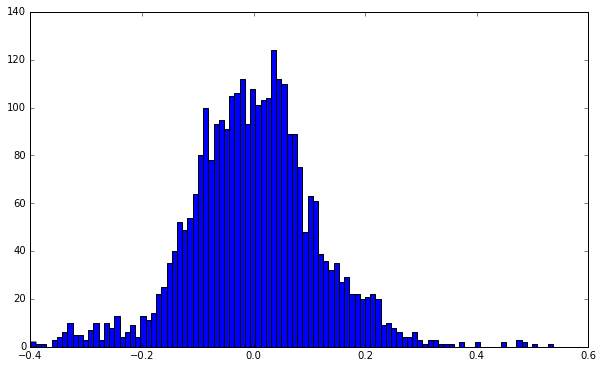

In [22]:
plt.hist(errors, bins = 100)

We can see considerable improvement in terms of variance of errors is concerned, which is much more stabilished than before. The pike near 2008 can be attributed to the 2008 economy crisis, and the model can be excused for not being able to generalise to that. However, the problem of autocorrelation is still evident. The distribution of errors is somewhat normal, so now the bulk of efforts have to geared towards addressing the autocorrelation.

In [23]:
errors.autocorr()

0.97080356564444448

As we can see, it's still staggeringly high. There are a few methods we can try to get rid of autocorrelation. One of them includes adding a time variable that can account for autocorrelation while training the model. I am going to have a time variable that starts from 1 and gets incremented every 5 rows. 

In [24]:
time = [i/5 for i in range(1, (len(df) + 1))]
lm4 = smf.ols(formula='np.log(predict) ~ np.log(Close) + time', data=df).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(predict)   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 3.408e+04
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:35:29   Log-Likelihood:                 2300.2
No. Observations:                3031   AIC:                            -4594.
Df Residuals:                    3028   BIC:                            -4576.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.2811      0.047      5.950      0.000         0.188     0.374
np.log(Close)     0.9323      0.010     96.537      0.000         0.913     0.951
time              0.0003   2.93e-05      8.821      0.000         0.000     0.000
==============================================================================
Omnibus:                      113.932   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.607
Skew:                          -0.068   Prob(JB):                     2.67e-72
Kurtosis:                       4.610   Cond. No.                     8.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

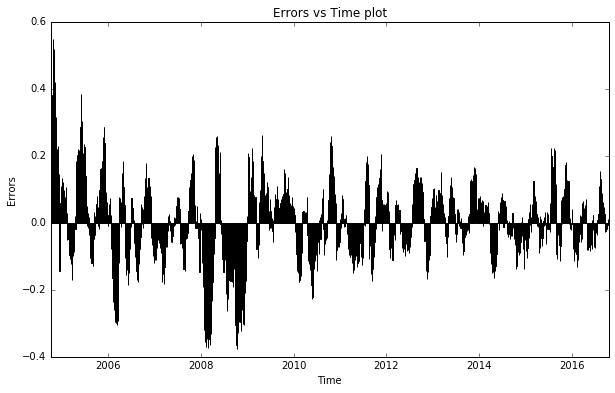

In [25]:
preds = lm4.predict()
errors = preds - np.log(df["predict"])
time_data = np.array([df.iloc[i].name.to_datetime() for i in range(len(df))]) #generate an array of dates 
plt.bar(time_data, errors)
plt.ylabel("Errors")
plt.xlabel("Time")
plt.title("Errors vs Time plot")

In [26]:
errors.autocorr()

0.97226583613383333

Again, we see that the added time variable hardly makes a difference to our results. Another way of addressing autocorrelation is to add a lagged variable of independent variable as a feature while modelling the data. let's go ahead and do that.  

In [27]:
df['lagged'] = df['predict'].shift(1)
df.dropna(inplace=True)

In [28]:
lm5 = smf.ols(formula='np.log(predict) ~ np.log(Close) + np.log(lagged)', data=df).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(predict)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.203e+06
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:35:44   Log-Likelihood:                 7639.5
No. Observations:                3030   AIC:                        -1.527e+04
Df Residuals:                    3027   BIC:                        -1.525e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0006      0.004      0.151      0.880        -0.007     0.008
np.log(Close)      0.0316      0.003     10.102      0.000         0.025     0.038
np.log(lagged)     0.9683      0.003    319.732      0.000         0.962     0.974
==============================================================================
Omnibus:                      712.102   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10850.512
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                      12.167   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

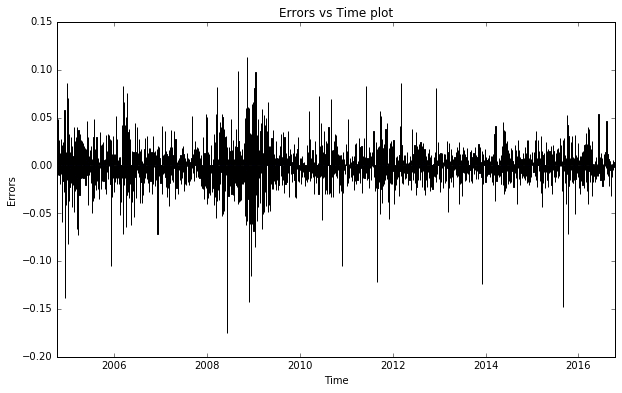

In [29]:
preds = lm5.predict()
errors = preds - np.log(df["predict"])
time_data = np.array([df.iloc[i].name.to_datetime() for i in range(len(df))]) #generate an array of dates 
plt.bar(time_data, errors)
plt.ylabel("Errors")
plt.xlabel("Time")
plt.title("Errors vs Time plot")

In [30]:
errors.autocorr()

0.0055920888165946966

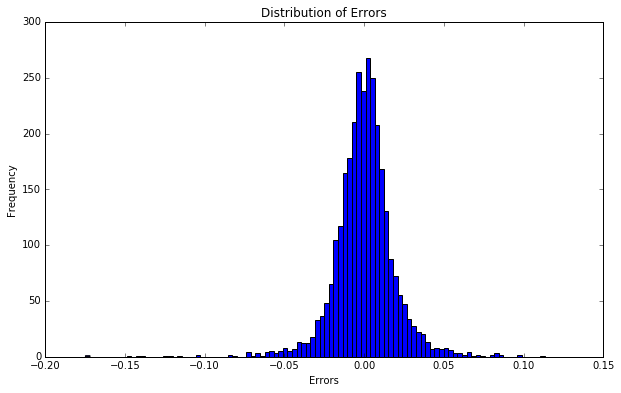

In [31]:
errors = lm5.predict() - np.log(df["predict"])
plt.hist(errors, bins = 100)
plt.xlabel("Errors")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")

Alas! Adding the lagged variable not only improves the variance of the errors, but it also takes care of the autocorrelation which is negiligibly low now. Also, the error distribution is also close to normal now. However, there's one thing of which I want to take note here. In spirit of keeping models as simple as possible, how about we try to drop the *Closed* variable? Though the p-value of the variable *Close* is satisfactory, let us just try, for the sake of experiment, fitting a model with just the lagged logged variables. 

In [32]:
lm6 = smf.ols(formula='np.log(predict) ~ np.log(lagged)', data=df).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(predict)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.327e+06
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        22:37:29   Log-Likelihood:                 7589.2
No. Observations:                3030   AIC:                        -1.517e+04
Df Residuals:                    3028   BIC:                        -1.516e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0114      0.004      3.037      0.002         0.004     0.019
np.log(lagged)     0.9982      0.001   1525.547      0.000         0.997     0.999
==============================================================================
Omnibus:                      659.060   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11352.001
Skew:                           0.560   Prob(JB):                         0.00
Kurtosis:                      12.416   Cond. No.                         61.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

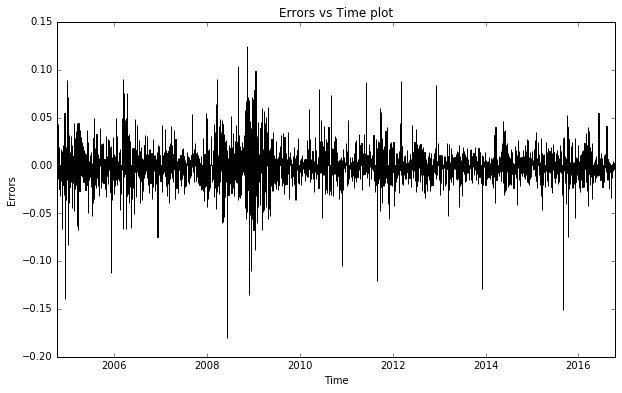

In [33]:
preds = lm6.predict()
errors = preds - np.log(df["predict"])
time_data = np.array([df.iloc[i].name.to_datetime() for i in range(len(df))]) #generate an array of dates 
plt.bar(time_data, errors)
plt.ylabel("Errors")
plt.xlabel("Time")
plt.title("Errors vs Time plot")

In [34]:
errors.autocorr()

0.0093847991468647869

Surprisingly, the autocorrelation increases but it's still not significant. Does this mean should we go with a simpler model? The answer is not a very decisive one. We need to test how the model performs on the validation data, and test data to be sure of which model to go with. **The test for assumptions only tell us whether the quality factors of the model are to be trusted or not. They don't tell us directly about the quality of the linear model** That's the job of quality factors given the assumptions hold true.

